# Figure 6: fixed point integration in step A
For the results in figure 6, the code is written in C++. 

Please follow the instruction in the Readme file to install the necessary packages. 


To run the code, use your compiler command with open mp: 


g++ -o exec.exe IPtrans_underdamped_stepA.cpp -fopenmp


./exec.exe

then run the notebook to visualise the results you have produced. 


In [1]:
# Import packages and set color schemes
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"
myblack="#48494B"

font_size = 25
line_w=3


plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern Roman"
})


def openCfile(file):
    """
    Open the C txt file in order to obtain m_1 matrix of results 
    -----------
    Input
    -----------
    file: txt file
        m_1 file containing the results from the C simulation

    Return
    -----------
    mat: list of list
        m_1 matrix containing the results of the simulations 
    """
    with open(file) as f:
        cols = f.readlines() #columns in the txt file
    n_col = len(cols) #number of columns in the text file
    mat=[] # matrix 
    for i in range(n_col): # for each columns 
        elems_i=cols[i].split(" ") #split the elements using " "
        col_i=[] #create an empty column i 
        for elem in elems_i: #for each element of the list 
            if elem!="\n" and elem!=" ": #compare each elements and discard " " and "\n"
                col_i.append(float(elem)) #append elems that are floats to the vector of interest
        mat.append(col_i) #create the matrix
    mat=np.array(mat)
    return(mat) #return the value of the matrix.

In [2]:
#
# !!! MODIFY CODE HERE
#
run_own_code=False #Set this to true of you wish to generate your own results


In [3]:
if run_own_code== True:
    path1="CFiles/data/stepA/"
else: 
    path1="./data_prerun/stepA/"
##
## no adaptive 
##

# Upload the computed values from the C file 
q_noada=np.hstack(openCfile(path1+"vec_noada_q.txt"))
q_B=np.hstack(openCfile(path1+"vec_tr_B_q.txt"))
q_O=np.hstack(openCfile(path1+"vec_tr_O_q.txt"))
nA_B=np.hstack(openCfile(path1+"vec_tr_B_nA.txt"))
nA_O=np.hstack(openCfile(path1+"vec_tr_O_nA.txt"))
dA_B=np.hstack(openCfile(path1+"vec_tr_B_dA.txt"))
dA_O=np.hstack(openCfile(path1+"vec_tr_O_dA.txt"))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


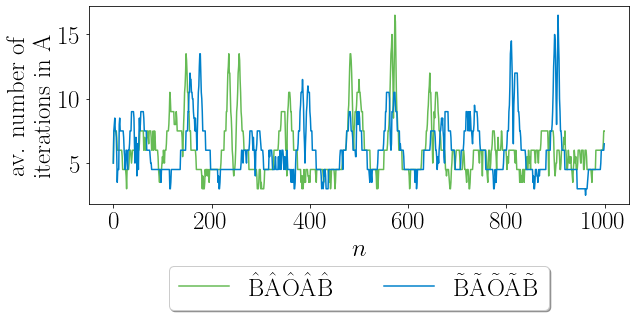

In [7]:
ub=1000 #only plot up to the iterations ub 
labB= "$\\hat{\\rm{B}}\\hat{\\rm{A}}\\hat{\\rm{O}}\\hat{\\rm{A}}\\hat{\\rm{B}}$"
labO="$\\tilde{\\rm{B}}\\tilde{\\rm{A}}\\tilde{\\rm{O}}\\tilde{\\rm{A}}\\tilde{\\rm{B}}$"

fig, ((axs))= plt.subplots(1,1,figsize=(10,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.15,bottom=0.35, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
axs.plot(nA_B[0:ub],color=mygreen,label=labB)
axs.plot(nA_O[0:ub],color=myblue,label=labO)
axs.plot(nA_B[0:1],color=myblack)
axs.set_xlabel("$n$",fontsize=font_size)
axs.set_ylabel("av. number of\niterations in ${\\rm{A}}$",fontsize=font_size)
axs.legend(fontsize=font_size,loc='upper center', bbox_to_anchor=(.5, -0.25),
          fancybox=True, shadow=True, ncol=2)
plt.savefig('figures/stepA_valq_it.eps', format='eps')
plt.savefig('figures/stepA_valq_it.pdf', format='pdf')

In [6]:
print("Average number of iterations for both $\\hat{BAOAB}$ and $\\tilde{BAOAB}$")
print(np.mean(nA_B))
print(np.mean(nA_O))
print("Max number of iterations for both $\\hat{BAOAB}$ and $\\tilde{BAOAB}$")
print(np.max(nA_B))
print(np.max(nA_O))

Average number of iterations for both $\hat{BAOAB}$ and $\tilde{BAOAB}$
5.85643
5.85493
Max number of iterations for both $\hat{BAOAB}$ and $\tilde{BAOAB}$
19.0
18.0
